In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deteksi-penyakit-hati/soal-uji.csv
/kaggle/input/deteksi-penyakit-hati/latih.csv
/kaggle/input/deteksi-penyakit-hati/contoh-submisi.csv


In [2]:
#Import all required libraries for reading data, analysing and visualizing data
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
print('Yoga Aji Herlambang')


Yoga Aji Herlambang


In [3]:
#Read the training & test data
data = pd.read_csv('../input/deteksi-penyakit-hati/latih.csv', delimiter=',', header=0)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,42,Female,2.3,1.1,292,29,39,4.1,1.8,0.70,1
1,18,Male,0.6,0.2,538,33,34,7.5,3.2,0.70,1
2,50,Female,1.7,0.6,430,28,32,6.8,3.5,1.00,1
3,34,Female,0.6,0.1,161,15,19,6.6,3.4,1.00,1
4,57,Male,1.3,0.4,259,40,86,6.5,2.5,0.60,1
...,...,...,...,...,...,...,...,...,...,...,...
461,50,Male,4.2,2.3,450,69,50,7.0,3.0,0.70,1
462,57,Male,0.7,0.2,208,35,97,5.1,2.1,0.70,1
463,28,Female,0.8,0.2,309,55,23,6.8,4.1,1.51,1
464,75,Male,10.6,5.0,562,37,29,5.1,1.8,0.50,1


In [4]:
data["Gender"] = pd.factorize(data.Gender) [0]


In [5]:
#cek data kosong 
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
#Mengganti data yang kosong dengan mean
data['Albumin_and_Globulin_Ratio'].fillna((data['Albumin_and_Globulin_Ratio'].mean()), inplace=True)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,42,0,2.3,1.1,292,29,39,4.1,1.8,0.70,1
1,18,1,0.6,0.2,538,33,34,7.5,3.2,0.70,1
2,50,0,1.7,0.6,430,28,32,6.8,3.5,1.00,1
3,34,0,0.6,0.1,161,15,19,6.6,3.4,1.00,1
4,57,1,1.3,0.4,259,40,86,6.5,2.5,0.60,1
...,...,...,...,...,...,...,...,...,...,...,...
461,50,1,4.2,2.3,450,69,50,7.0,3.0,0.70,1
462,57,1,0.7,0.2,208,35,97,5.1,2.1,0.70,1
463,28,0,0.8,0.2,309,55,23,6.8,4.1,1.51,1
464,75,1,10.6,5.0,562,37,29,5.1,1.8,0.50,1


In [7]:
#feature selection 
Feature = data[['Age','Gender','Total_Bilirubin','Direct_Bilirubin',
                'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

In [8]:
X = Feature.values 
y = data['Dataset'].values 
y[0:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1])

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=20)
print (X_train.shape)
print (y_train.shape)
print (X_val.shape)
print (y_val.shape)


(349, 10)
(349,)
(117, 10)
(117,)


In [10]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,

In [11]:
X_train

array([[53. ,  1. , 19.8, ...,  8.1,  2.5,  0.4],
       [29. ,  0. ,  0.8, ...,  8.2,  4.1,  1. ],
       [49. ,  1. ,  0.6, ...,  5. ,  2.4,  0.9],
       ...,
       [68. ,  1. ,  0.7, ...,  5.8,  2.9,  1. ],
       [50. ,  1. ,  0.6, ...,  4.8,  2.6,  1.1],
       [45. ,  0. ,  1. , ...,  8.6,  4.3,  1. ]])

In [12]:
encoder = OneHotEncoder(handle_unknown='ignore')
y_train_new = encoder.fit_transform(y_train[:, np.newaxis]).toarray()
y_val_new = encoder.fit_transform(y_val[:, np.newaxis]).toarray()

In [13]:
y_val_new

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [14]:
#mempersiapan arsitetur JST
model = tf.keras.models.Sequential ([
tf.keras.layers.Dense(98, input_shape=(10,), activation='relu'), 
tf.keras.layers.Dense(2, activation="softmax")
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("sukses")


sukses


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 98)                1078      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 198       
Total params: 1,276
Trainable params: 1,276
Non-trainable params: 0
_________________________________________________________________


In [16]:
#epoh = 100 batch 5
h = model.fit(X_train, y_train_new, epochs=300, batch_size=3, validation_data=(X_val, y_val_new))

Epoch 1/300
117/117 [==============================] - 1s 7ms/step - loss: 8.6425 - accuracy: 0.5657 - val_loss: 0.9070 - val_accuracy: 0.6068
Epoch 2/300
117/117 [==============================] - 0s 3ms/step - loss: 1.1189 - accuracy: 0.6156 - val_loss: 2.8968 - val_accuracy: 0.4701
Epoch 3/300
117/117 [==============================] - 0s 3ms/step - loss: 1.4488 - accuracy: 0.6293 - val_loss: 0.7660 - val_accuracy: 0.5983
Epoch 4/300
117/117 [==============================] - 0s 2ms/step - loss: 1.1023 - accuracy: 0.5764 - val_loss: 0.6862 - val_accuracy: 0.7094
Epoch 5/300
117/117 [==============================] - 0s 3ms/step - loss: 0.7806 - accuracy: 0.6256 - val_loss: 0.5130 - val_accuracy: 0.7179
Epoch 6/300
117/117 [==============================] - 0s 3ms/step - loss: 0.8541 - accuracy: 0.6645 - val_loss: 0.9288 - val_accuracy: 0.7179
Epoch 7/300
117/117 [==============================] - 0s 3ms/step - loss: 1.3596 - accuracy: 0.6727 - val_loss: 0.7603 - val_accuracy: 0.7094

In [17]:
#save model
model.save('modelLeNet.h5')
model.save_weights('weightLeNet5.h5')

In [18]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs)')

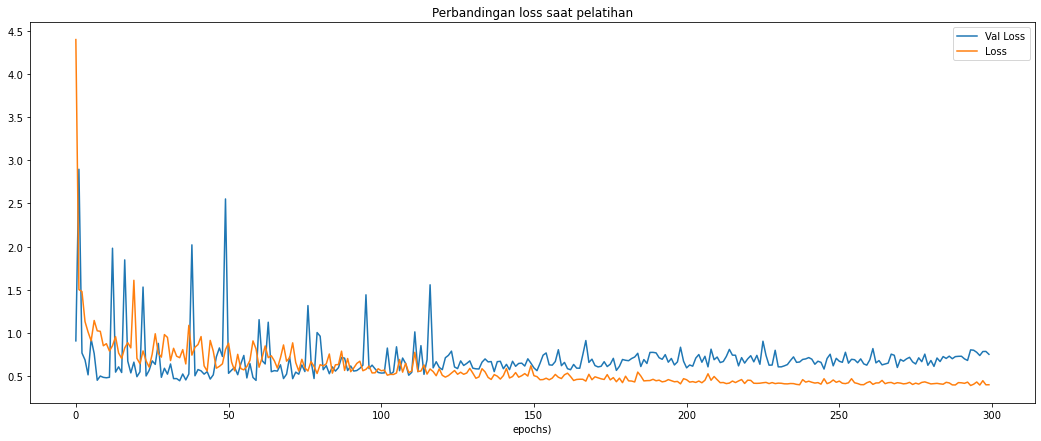

In [19]:
plt. figure(figsize=(18,7))
#addtitle
plt.title("Perbandingan loss saat pelatihan")
sns.lineplot(data=np.array(h.history['val_loss']), label="Val Loss") 
sns.lineplot(data=np.array(h.history['loss']), label="Loss") 
plt.xlabel("epochs)")

Text(0.5, 0, 'epochs)')

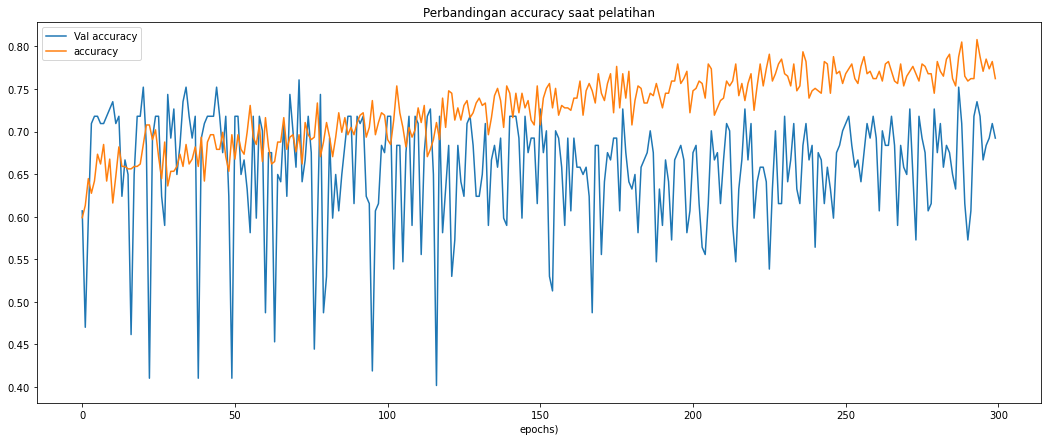

In [20]:
plt. figure(figsize=(18,7))
#addtitle
plt.title("Perbandingan accuracy saat pelatihan")
sns.lineplot(data=np.array(h.history['val_accuracy']), label="Val accuracy") 
sns.lineplot(data=np.array(h.history['accuracy']), label="accuracy") 
plt.xlabel("epochs)")


In [21]:
#evaluasi
model.evaluate(X_val, y_val_new)

4/4 [==============================] - 0s 3ms/step - loss: 0.7511 - accuracy: 0.6923


[0.7510620355606079, 0.692307710647583]

In [22]:
#Read the training & test data
data_u = pd.read_csv('../input/deteksi-penyakit-hati/soal-uji.csv', delimiter=',', header=0)
data_u

,Id,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0,60,Male,8.9,4.0,950,33,32,6.8,3.1,0.80
1,1,50,Male,7.3,3.7,92,44,236,6.8,1.6,0.30
2,2,67,Male,2.2,1.1,198,42,39,7.2,3.0,0.70
3,3,20,Female,16.7,8.4,200,91,101,6.9,3.5,1.02
4,4,57,Male,0.6,0.1,210,51,59,5.9,2.7,0.80
...,...,...,...,...,...,...,...,...,...,...,...
112,112,37,Male,0.7,0.2,235,96,54,9.5,4.9,1.00
113,113,60,Male,0.7,0.2,174,32,14,7.8,4.2,1.10
114,114,38,Male,1.5,0.4,298,60,103,6.0,3.0,1.00
115,115,58,Female,0.8,0.2,130,24,25,7.0,4.0,1.30


In [23]:
#Mengubah nilai gender jadi integer
data_u["Gender"] = pd.factorize(data_u.Gender) [0]
data_u

,Id,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0,60,0,8.9,4.0,950,33,32,6.8,3.1,0.80
1,1,50,0,7.3,3.7,92,44,236,6.8,1.6,0.30
2,2,67,0,2.2,1.1,198,42,39,7.2,3.0,0.70
3,3,20,1,16.7,8.4,200,91,101,6.9,3.5,1.02
4,4,57,0,0.6,0.1,210,51,59,5.9,2.7,0.80
...,...,...,...,...,...,...,...,...,...,...,...
112,112,37,0,0.7,0.2,235,96,54,9.5,4.9,1.00
113,113,60,0,0.7,0.2,174,32,14,7.8,4.2,1.10
114,114,38,0,1.5,0.4,298,60,103,6.0,3.0,1.00
115,115,58,1,0.8,0.2,130,24,25,7.0,4.0,1.30


In [24]:
data_u.isna().sum()

Id                            0
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [25]:
Feature_u = data_u[['Age','Gender','Total_Bilirubin','Direct_Bilirubin',
                'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

In [26]:
x_u = Feature_u.values

In [27]:
x_u

array([[60. ,  0. ,  8.9, ...,  6.8,  3.1,  0.8],
       [50. ,  0. ,  7.3, ...,  6.8,  1.6,  0.3],
       [67. ,  0. ,  2.2, ...,  7.2,  3. ,  0.7],
       ...,
       [38. ,  0. ,  1.5, ...,  6. ,  3. ,  1. ],
       [58. ,  1. ,  0.8, ...,  7. ,  4. ,  1.3],
       [42. ,  1. ,  0.9, ...,  8.5,  4.4,  1. ]])

In [28]:
y_upred = model.predict(x_u)
y_upred = (y_upred > 5)
y_upred

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [Fal

In [29]:
pd.read_csv('../input/deteksi-penyakit-hati/latih.csv').to_csv('YogaAjiHerlambang.csv')